# IPL FIRST INNINGS SCORE PREDICTOR

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ipl.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
#removing the not-so important columns
df.drop(['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'],axis=1, inplace=True)

In [5]:
df.head(3)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222


In [6]:
#getting the teams and removing the irregular teams(which play every year)
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [7]:
regular_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

#### finding the regular teams: 

* * df[ (df['bat_team'].isin(regular_teams)) ] 
* * df[ (df['bowl_team'].isin(regular_teams)) ] 

In [8]:
#removing the irregular teams using ---> boolean conditional selection

df = df[(df['bowl_team'].isin(regular_teams)) & (df['bat_team'].isin(regular_teams))]

In [9]:
#dataframe contains only the regular teams

df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [10]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

#### Checking the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53811 entries, 0 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            53811 non-null  object 
 1   bat_team        53811 non-null  object 
 2   bowl_team       53811 non-null  object 
 3   runs            53811 non-null  int64  
 4   wickets         53811 non-null  int64  
 5   overs           53811 non-null  float64
 6   runs_last_5     53811 non-null  int64  
 7   wickets_last_5  53811 non-null  int64  
 8   total           53811 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.1+ MB


In [12]:
df.isnull().sum()     #data is clean ---> no NaN values

date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

In [13]:
df.describe()

,runs,wickets,overs,runs_last_5,wickets_last_5,total
count,53811.000000,53811.000000,53811.000000,53811.000000,53811.000000,53811.000000
mean,75.249559,2.406738,9.772972,33.427905,1.118043,161.733493
std,49.303939,2.011816,5.773907,15.049807,1.052852,30.009152
min,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,34.000000,1.000000,4.600000,25.000000,0.000000,142.000000
50%,70.000000,2.000000,9.600000,34.000000,1.000000,163.000000
75%,111.000000,4.000000,14.600000,43.000000,2.000000,183.000000
max,246.000000,10.000000,19.600000,94.000000,7.000000,246.000000


In [14]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

### data visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
corr = df.corr()
corr

,runs,wickets,overs,runs_last_5,wickets_last_5,total
runs,1.000000,0.359222,0.879575,0.584435,0.115359,0.391254
wickets,0.359222,1.000000,0.635803,-0.203286,0.633125,-0.457055
overs,0.879575,0.635803,1.000000,0.286564,0.221914,0.028468
runs_last_5,0.584435,-0.203286,0.286564,1.000000,-0.276398,0.587091
wickets_last_5,0.115359,0.633125,0.221914,-0.276398,1.000000,-0.297397
total,0.391254,-0.457055,0.028468,0.587091,-0.297397,1.000000


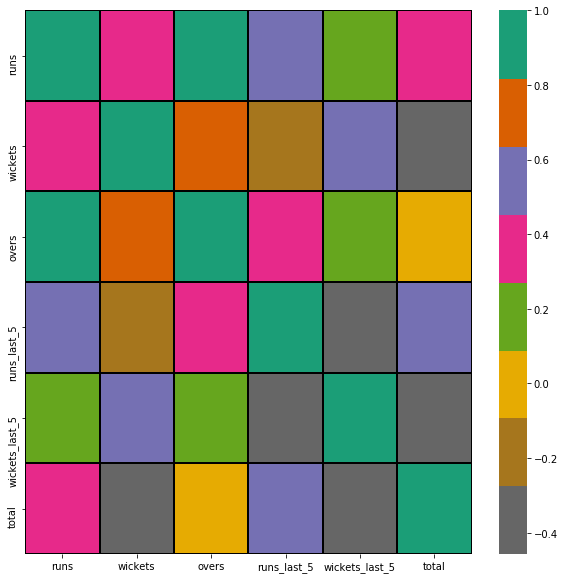

In [17]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'Dark2_r', linecolor='black',linewidths=1)
plt.savefig('C:\\Users\\welcome\\Desktop\\correlation.png')

##### observation: 

* wickets  --->  large Negative correlation

* runs_last_5 ---> large Positive correlation

In [18]:
#datetime conversion: string ---> datetime object
from datetime import datetime

In [19]:
#using lambda function:
date_converter = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [20]:
df['date'] = df['date'].apply(date_converter)

In [21]:
#Converted to --->      <class 'pandas._libs.tslibs.timestamps.Timestamp'>

## Data Preprocessing

* converting the categorical data into labels; as machine can understand only numbers\
* Here the classes are Nominal objects: no relationship between the classes\
* for Nominal classes we can use Pandas get_dummies()

In [22]:
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [23]:
encoded_df.head(3)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [25]:
# Rearranging the columns: becomes a little easy in flask usage
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 
                         'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
                         'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 
                         'bat_team_Rajasthan Royals','bat_team_Royal Challengers Bangalore',
                         'bat_team_Sunrisers Hyderabad','bowl_team_Chennai Super Kings', 
                         'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
                         'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
                         'bowl_team_Rajasthan Royals','bowl_team_Royal Challengers Bangalore', 
                         'bowl_team_Sunrisers Hyderabad','overs', 'runs', 'wickets', 
                         'runs_last_5', 'wickets_last_5', 'total']]

In [26]:
encoded_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


# Splitting the data

In [27]:
#we can't simply split the data as we have a datetime columns
#so we split accordingly

#encoded_df['date'].dt.year ---> gives the year

#encoded_df['date'].dt.month ---> gives the month

#encoded_df['date'].dt.day ---> gives the day


In [28]:
#CODE to get all the years
encoded_df['date'].dt.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [29]:
#Splitting the data into train and test set

#AIM --> training occurs on the data of the year <= 2016
#    --> testing occurs on the data of the year >= 2017

training_time_period = encoded_df['date'].dt.year <= 2016

testing_time_period = encoded_df['date'].dt.year >= 2017

### Splitting the data: X--> contains features and y-->contains Target

In [30]:
#X --> drop the target column --> Total Score

X_train = encoded_df.drop('total', axis=1)[training_time_period]

X_test = encoded_df.drop('total', axis=1)[testing_time_period]


In [31]:
#y

y_train = encoded_df[training_time_period]['total'].values

y_test = encoded_df[testing_time_period]['total'].values


In [32]:
#We have to remove the date column from X_train and X_test || no use apart from splitting

X_train.drop('date', axis=True, inplace=True)

X_test.drop('date', axis=True, inplace=True)

In [36]:
X_train.columns

Index(['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5'],
      dtype='object')

# Model 

#### We will use Grid Search to select the best model
* RandomForestRegressor
* Ridge Regression
* Lasso Regression
* XgBoost Regression

In [192]:
from sklearn.model_selection import GridSearchCV

In [194]:
#import all the models
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

### Ridge

In [203]:
parameters = {"alpha" : [1e-3,1e-2,1,5,10,20,30,35,40,50,80,100]}

ridge_regression = GridSearchCV(Ridge(),
                               param_grid = parameters,
                               cv = 5,
                               verbose = 2)


In [204]:
ridge_regression.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.1s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 50,
                                   80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [206]:
print(ridge_regression.best_score_)

0.6144668285329493


### Lasso

In [207]:
parameters = {"alpha" : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

lasso_regression = GridSearchCV(Lasso(),
                               param_grid = parameters,
                               cv = 5,
                               verbose = 2)


In [209]:
lasso_regression.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] alpha=1e-15 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4533346.686032622, tolerance: 2529.955696594561

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ...................................... alpha=1e-15, total=   1.9s
[CV] alpha=1e-15 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4468528.693573645, tolerance: 2547.0380710286604



[CV] ...................................... alpha=1e-15, total=   1.7s
[CV] alpha=1e-15 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4647853.188535378, tolerance: 2667.8126904366463



[CV] ...................................... alpha=1e-15, total=   1.8s
[CV] alpha=1e-15 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4278158.9240870215, tolerance: 2712.348891397666



[CV] ...................................... alpha=1e-15, total=   1.6s
[CV] alpha=1e-15 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4560690.434269102, tolerance: 2646.1437660192796



[CV] ...................................... alpha=1e-15, total=   1.6s
[CV] alpha=1e-10 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 589201.8075634232, tolerance: 2529.955696594561



[CV] ...................................... alpha=1e-10, total=   1.7s
[CV] alpha=1e-10 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 482836.0262052566, tolerance: 2547.0380710286604



[CV] ...................................... alpha=1e-10, total=   1.6s
[CV] alpha=1e-10 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 253601.65044812672, tolerance: 2667.8126904366463



[CV] ...................................... alpha=1e-10, total=   1.8s
[CV] alpha=1e-10 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 273552.07698424254, tolerance: 2712.348891397666



[CV] ...................................... alpha=1e-10, total=   1.7s
[CV] alpha=1e-10 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 328224.7875914769, tolerance: 2646.1437660192796



[CV] ...................................... alpha=1e-10, total=   1.6s
[CV] alpha=1e-08 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 589202.6512922905, tolerance: 2529.955696594561



[CV] ...................................... alpha=1e-08, total=   1.6s
[CV] alpha=1e-08 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 482835.8177968096, tolerance: 2547.0380710286604



[CV] ...................................... alpha=1e-08, total=   1.7s
[CV] alpha=1e-08 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 253599.46751796268, tolerance: 2667.8126904366463



[CV] ...................................... alpha=1e-08, total=   1.6s
[CV] alpha=1e-08 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 273552.77759379987, tolerance: 2712.348891397666



[CV] ...................................... alpha=1e-08, total=   1.6s
[CV] alpha=1e-08 .....................................................


C:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 328228.2236827966, tolerance: 2646.1437660192796



[CV] ...................................... alpha=1e-08, total=   1.6s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.3s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.3s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.3s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.3s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.5s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.3s
[CV] alpha=0.01 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   29.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [210]:
print(lasso_regression.best_score_)

0.6233614941136933


In [244]:
print(lasso_regression.best_estimator_)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


### RandomForestRegressor

In [221]:
parameters = {  "n_estimators" : [1,5,10,50,100,150,200],

             }

random_forest_regression = GridSearchCV(RandomForestRegressor(),
                                   param_grid = parameters,
                                   cv = 5,
                                   verbose = 2)


In [222]:
random_forest_regression.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... n_estimators=1, total=   0.2s
[CV] n_estimators=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................... n_estimators=1, total=   0.2s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.2s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.2s
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.2s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.8s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.8s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.8s
[CV] n_estimators=5 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  6.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [226]:
print(random_forest_regression.best_score_)

0.5149746649768163


### Xgb Regressor

In [238]:
parameters = {'learning_rate': [.03, 0.05, .07],
              'n_estimators': [500]}


xgb_regressor = GridSearchCV(XGBRegressor(),
                            param_grid = parameters,
                            cv = 3,
                            verbose = 2)

In [239]:
xgb_regressor.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] learning_rate=0.03, n_estimators=500 ............................
[16:54:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. learning_rate=0.03, n_estimators=500, total=  16.3s
[CV] learning_rate=0.03, n_estimators=500 ............................
[16:55:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV] ............. learning_rate=0.03, n_estimators=500, total=  16.0s
[CV] learning_rate=0.03, n_estimators=500 ............................
[16:55:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............. learning_rate=0.03, n_estimators=500, total=  16.1s
[CV] learning_rate=0.05, n_estimators=500 ............................
[16:55:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............. learning_rate=0.05, n_estimators=500, total=  15.4s
[CV] learning_rate=0.05, n_estimators=500 ............................
[16:55:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ............. learning_rate=0.05, n_estimators=500, total=  16.3s
[CV] learning_rate=0.05, n_estimators=500 ............................
[16:56:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecate

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.03, 0.05, 0.07],
                         'n_estimators': [500]},
             pre_disp

In [241]:
print(xgb_regressor.best_score_)

0.5977722958055464


In [242]:
#Summary

###### We use Lasso Regression as it gave best score

In [247]:
model = Lasso( alpha=1, copy_X=True, fit_intercept=True,
               max_iter=1000, normalize=False,positive=False, 
               precompute=False, random_state=None, selection='cyclic',
               tol=0.0001, warm_start=False)

In [249]:

model.fit(X_train,y_train)


Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [250]:

predictions  = model.predict(X_test)


In [253]:
#Metrics
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 12.214053814850246
MSE: 262.3797366400714
RMSE: 16.19813991296752


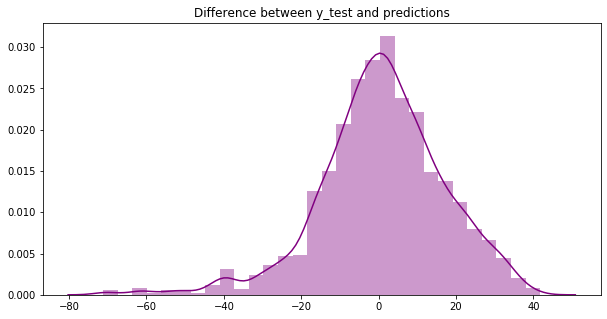

In [269]:
plt.figure(figsize = (10,5))
import seaborn as sns
sns.distplot(y_test-predictions, color='purple', bins= 30)

plt.title('Difference between y_test and predictions')
plt.savefig('C:\\Users\\welcome\\Desktop\\dist.png')

## saving the model

In [276]:
import pickle

In [278]:
pickle.dump(model, open('model.pkl', 'wb'))